In [1]:
 if 'google.colab' in str(get_ipython()):
    # authorize & import/mount colab/google drive
    from google.colab import output
    from google.colab import drive
    from google.colab import auth
    drive.mount('/content/gd')

    # install libraries
    !pip install --upgrade openai
    !pip install --upgrade numba
    !pip install transformers
    !pip install sentence_transformers
    !pip install unidecode
    !pip install bertopic
    !pip install unidecode
    !pip install pandas==1.1.5

    # clear output
    output.clear()

In [2]:
import pandas as pd
import numpy as np
import re
import warnings
import openai
import json
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 300)
warnings.filterwarnings("ignore")
import os
openai.api_key = os.environ['openai_api']

In [3]:
# Your path might be different but make sure the classification_examples_w_labels.txt lives there to load
os.chdir("/content/gd/MyDrive/w210_Capstone_Project_Fall2021/Repo/Colab_notebooks/")

In [6]:
# Load Gsheet or csv of Classification with ground thruth here
test_set = pd.read_csv('alex_test_set - classfication_eval.csv')

In [7]:
test_set

,Question,Label
0,Who is your hero?,Factual
1,"If you could live anywhere, where would it be?",Factual
2,What is your favorite family vacation?,Factual
3,What would you change about yourself if you could?,Non-factual
4,What really makes you angry?,Non-factual
5,What is your favorite book to read?,Factual
6,Who is your favorite author?,Factual
7,What makes you laugh the most?,Non-factual
8,Do you like or dislike surprises? Why or why not?,Non-factual
9,How many pairs of shoes do you own?,Factual


In [8]:
with open("classification_examples_w_labels.txt", "r") as fp:
  examples = json.load(fp)

In [10]:
len(examples)

62

In [11]:
# Reference for Classification endpoint: https://beta.openai.com/docs/guides/classifications
# Reference for API params: https://beta.openai.com/docs/api-reference/classifications/create
# Example call
openai.Classification.create(
    search_model="ada", 
    model="davinci",
    examples = examples,
    query="What advice do I have for you?",
    labels = ["Factual","Non-factual"] ,
    max_examples=len(examples)
)

<OpenAIObject classification at 0x7f3c00914a10> JSON: {
  "completion": "cmpl-4BDHyH8STAZWwNKHYsgjCgsyVw8gs",
  "label": "Non-factual",
  "model": "davinci:2020-05-03",
  "object": "classification",
  "search_model": "ada",
  "selected_examples": [
    {
      "document": 4,
      "label": "Factual",
      "text": "When and where were you born?"
    },
    {
      "document": 0,
      "label": "Factual",
      "text": "Where did you grow up?"
    },
    {
      "document": 1,
      "label": "Non-factual",
      "text": "Is there a place you go when you go to inside of you when you're free soloing that's different then when you're out with ropes and bolts on a rock?"
    },
    {
      "document": 24,
      "label": "Non-factual",
      "text": "What do you believe is the most important characteristic your sons and daughters should have?"
    },
    {
      "document": 56,
      "label": "Non-factual",
      "text": "Is your glass half full or half empty?"
    },
    {
      "document":

In [22]:
# Function use to evaluate, feel free to vary search model but I'd recommend to keep curie for model param
def classify_question(question):
  question_type = openai.Classification.create(
      search_model="ada", 
      model="davinci",
      examples=examples,
      query=question,
      labels = ["Factual","Non-factual"],    
      max_examples=len(examples))
  question_type = question_type["label"]
  return question_type

In [32]:
preds = []
for q in test_set["Question"]:
  question_classified = classify_question(q)
  preds.append(question_classified)
test_set["Prediction"] = preds

In [33]:
test_set

,Question,Label,Label_Binary,Prediction,Prediction_Binary
0,Who is your hero?,Factual,1,Factual,0
1,"If you could live anywhere, where would it be?",Factual,1,Factual,0
2,What is your favorite family vacation?,Factual,1,Factual,0
3,What would you change about yourself if you could?,Non-factual,0,Non-factual,0
4,What really makes you angry?,Non-factual,0,Non-factual,0
5,What is your favorite book to read?,Factual,1,Factual,0
6,Who is your favorite author?,Factual,1,Factual,0
7,What makes you laugh the most?,Non-factual,0,Factual,0
8,Do you like or dislike surprises? Why or why not?,Non-factual,0,Non-factual,0
9,How many pairs of shoes do you own?,Factual,1,Factual,0


In [34]:
test_set["Label_Binary"] = np.where(test_set['Label'] == 'Factual', 1, 0)
test_set["Prediction_Binary"] = np.where(test_set['Prediction'] == 'Factual', 1, 0)

In [35]:
test_set

,Question,Label,Label_Binary,Prediction,Prediction_Binary
0,Who is your hero?,Factual,1,Factual,1
1,"If you could live anywhere, where would it be?",Factual,1,Factual,1
2,What is your favorite family vacation?,Factual,1,Factual,1
3,What would you change about yourself if you could?,Non-factual,0,Non-factual,0
4,What really makes you angry?,Non-factual,0,Non-factual,0
5,What is your favorite book to read?,Factual,1,Factual,1
6,Who is your favorite author?,Factual,1,Factual,1
7,What makes you laugh the most?,Non-factual,0,Factual,1
8,Do you like or dislike surprises? Why or why not?,Non-factual,0,Non-factual,0
9,How many pairs of shoes do you own?,Factual,1,Factual,1


In [36]:
precision = precision_score(test_set.Label_Binary, test_set.Prediction_Binary, average='binary')
recall = recall_score(test_set.Label_Binary, test_set.Prediction_Binary, average='binary')
f1 = f1_score(test_set.Label_Binary, test_set.Prediction_Binary, average='binary')
tn, fp, fn, tp = confusion_matrix(test_set.Label_Binary, test_set.Prediction_Binary).ravel()
specificity = tn / (tn+fp)
accuracy = accuracy_score(test_set.Label_Binary, test_set.Prediction_Binary)

In [37]:
conf_matrix = confusion_matrix(test_set.Label_Binary, test_set.Prediction_Binary)

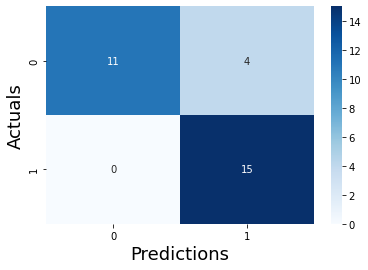

In [38]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
sns.set(color_codes=True)

In [39]:
print('F1 Score = {}'.format(f1))
print('Accuracy = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Recall = {}'.format(recall))
print('Specificity = {}'.format(specificity))

F1 Score = 0.8823529411764706
Accuracy = 0.8666666666666667
Precision = 0.7894736842105263
Recall = 1.0
Specificity = 0.7333333333333333


In [40]:
test_set.to_csv("classification_eval_results.csv")